# Train model

In [1]:
batch_size=32
pickle_file='test_dataset_cluster_labeled.pickle'
limit_seq_len=1000

In [2]:
from dataset import DwgDataset
dwg_dataset = DwgDataset(pickle_file=pickle_file, batch_size=batch_size, limit_seq_len=limit_seq_len)

In [3]:
lr=0.001
epochs=42
train_verbose=True

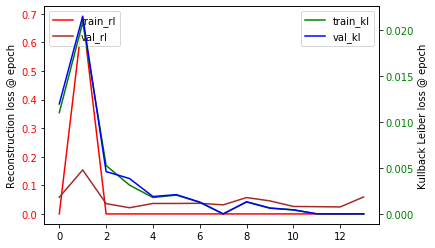

  [  14-   0 @   0.3 sec] RLoss: 0.00010 KL Loss: 0.0000
  [  14-   1 @   0.6 sec] RLoss: 0.00010 KL Loss: 0.0000
  [  14-   2 @   0.8 sec] RLoss: 0.00010 KL Loss: 0.0000
  [  14-   3 @   1.1 sec] RLoss: 0.00010 KL Loss: 0.0000
  [  14-   4 @   1.4 sec] RLoss: 0.00010 KL Loss: 0.0000
  [  14-   5 @   1.7 sec] RLoss: 0.00010 KL Loss: 0.0000
  [  14-   6 @   2.0 sec] RLoss: 0.00010 KL Loss: 0.0000
  [  14-   7 @   2.2 sec] RLoss: 0.00010 KL Loss: 0.0000
  [  14-   8 @   2.5 sec] RLoss: 0.00010 KL Loss: 0.0000
  [  14-   9 @   2.8 sec] RLoss: 0.00010 KL Loss: 0.0000
  [  14-  10 @   3.1 sec] RLoss: 0.00010 KL Loss: 0.0000
  [  14-  11 @   3.4 sec] RLoss: 0.00010 KL Loss: 0.0000
  [  14-  12 @   3.6 sec] RLoss: 0.00010 KL Loss: 0.0000
  [  14-  13 @   3.9 sec] RLoss: 0.00010 KL Loss: 0.0000
  [  14-  14 @   4.2 sec] RLoss: 0.00010 KL Loss: 0.0000
  [  14-  15 @   4.5 sec] RLoss: 0.00010 KL Loss: 0.0000
  [  14-  16 @   4.8 sec] RLoss: 0.00010 KL Loss: 0.0000
  [  14-  17 @   5.0 sec] RLoss

KeyboardInterrupt: 

In [4]:
from sketch_rnn import Trainer
from IPython.display import clear_output
from plot_graphics import plot_history

trainer = Trainer(
    dwg_dataset, 
    lr=lr, 
    train_verbose=train_verbose)

train_kl_losses = []
train_rl_losses = []
val_kl_losses  = []
val_rl_losses  = []

for epoch in range(epochs):
    clear_output(wait=True)
    
    plot_history(train_rl_losses, train_kl_losses, val_rl_losses, val_kl_losses)
    test_rl, test_kl, val_rl, val_kl = trainer.train_epoch(epoch)
    
    train_kl_losses.append(test_kl)
    train_rl_losses.append(test_rl)
    val_kl_losses.append(val_kl)
    val_rl_losses.append(val_rl)

# Calculate test accuracy
test_kl, test_rl = trainer.CalculateLoaderAccuracy(trainer.test_loader)
print('Test losses rl:{:1.4f} kl:{:1.4f}'.format(test_rl, test_kl))    